## Recipe 50 - Extract date time parts 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# let's create a toy dataframe with some date variables

rng_ = pd.date_range('2019-03-05', periods=20, freq='1h15min10s')
df = pd.DataFrame({'date': rng_}) 
df.head()

,date
0,2019-03-05 00:00:00
1,2019-03-05 01:15:10
2,2019-03-05 02:30:20
3,2019-03-05 03:45:30
4,2019-03-05 05:00:40


In [3]:
# extract hr, min and sec

df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute
df['sec'] = df['date'].dt.second

df.head()

,date,hour,min,sec
0,2019-03-05 00:00:00,0,0,0
1,2019-03-05 01:15:10,1,15,10
2,2019-03-05 02:30:20,2,30,20
3,2019-03-05 03:45:30,3,45,30
4,2019-03-05 05:00:40,5,0,40


In [4]:
# the same in one line

df[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df['date']])

df.head()

,date,hour,min,sec,h,m,s
0,2019-03-05 00:00:00,0,0,0,0,0,0
1,2019-03-05 01:15:10,1,15,10,1,15,10
2,2019-03-05 02:30:20,2,30,20,2,30,20
3,2019-03-05 03:45:30,3,45,30,3,45,30
4,2019-03-05 05:00:40,5,0,40,5,0,40


In [5]:
df['hour'].unique()

array([ 0,  1,  2,  3,  5,  6,  7,  8, 10, 11, 12, 13, 15, 16, 17, 18, 20,
       21, 22, 23], dtype=int64)

In [6]:
# is it morning?

df['is_morning'] = np.where( (df['hour'] < 12) & (df['hour'] > 6), 1, 0 )

df.head()

,date,hour,min,sec,h,m,s,is_morning
0,2019-03-05 00:00:00,0,0,0,0,0,0,0
1,2019-03-05 01:15:10,1,15,10,1,15,10,0
2,2019-03-05 02:30:20,2,30,20,2,30,20,0
3,2019-03-05 03:45:30,3,45,30,3,45,30,0
4,2019-03-05 05:00:40,5,0,40,5,0,40,0


## Recipe 51 - Elapsed time 

In [1]:
import datetime
import numpy as np
import pandas as pd

In [8]:
# let's create a toy dataframe with some date variables

rng_hr = pd.date_range('2019-03-05', periods=20, freq='H')
rng_month = pd.date_range('2019-03-05', periods=20, freq='M')

df = pd.DataFrame({'date1': rng_hr, 'date2': rng_month}) 
df.head()

,date1,date2
0,2019-03-05 00:00:00,2019-03-31
1,2019-03-05 01:00:00,2019-04-30
2,2019-03-05 02:00:00,2019-05-31
3,2019-03-05 03:00:00,2019-06-30
4,2019-03-05 04:00:00,2019-07-31


In [9]:
# let's capture the difference in days between the 2 variables

df['elapsed_days'] = (df['date2'] - df['date1']).dt.days

df.head()

,date1,date2,elapsed_days
0,2019-03-05 00:00:00,2019-03-31,26
1,2019-03-05 01:00:00,2019-04-30,55
2,2019-03-05 02:00:00,2019-05-31,86
3,2019-03-05 03:00:00,2019-06-30,116
4,2019-03-05 04:00:00,2019-07-31,147


In [10]:
# let's capture the difference in months between the 2 variables

df['months_passed'] = ((df['date2'] - df['date1']) / np.timedelta64(1, 'M'))
df['months_passed'] = np.round(df['months_passed'],0)

df.head()

,date1,date2,elapsed_days,months_passed
0,2019-03-05 00:00:00,2019-03-31,26,1.0
1,2019-03-05 01:00:00,2019-04-30,55,2.0
2,2019-03-05 02:00:00,2019-05-31,86,3.0
3,2019-03-05 03:00:00,2019-06-30,116,4.0
4,2019-03-05 04:00:00,2019-07-31,147,5.0


In [11]:
# calculate difference in seconds and minutes

df['diff_seconds'] = (df['date2'] - df['date1'])/np.timedelta64(1,'s')
df['diff_minutes'] = (df['date2'] - df['date1'])/np.timedelta64(1,'m')

df.head()

,date1,date2,elapsed_days,months_passed,diff_seconds,diff_minutes
0,2019-03-05 00:00:00,2019-03-31,26,1.0,2246400.0,37440.0
1,2019-03-05 01:00:00,2019-04-30,55,2.0,4834800.0,80580.0
2,2019-03-05 02:00:00,2019-05-31,86,3.0,7509600.0,125160.0
3,2019-03-05 03:00:00,2019-06-30,116,4.0,10098000.0,168300.0
4,2019-03-05 04:00:00,2019-07-31,147,5.0,12772800.0,212880.0


In [12]:
# calculate difference to today

df['to_today'] = (datetime.datetime.today() - df['date1'])

df.head()

,date1,date2,elapsed_days,months_passed,diff_seconds,diff_minutes,to_today
0,2019-03-05 00:00:00,2019-03-31,26,1.0,2246400.0,37440.0,1298 days 22:54:22.638789
1,2019-03-05 01:00:00,2019-04-30,55,2.0,4834800.0,80580.0,1298 days 21:54:22.638789
2,2019-03-05 02:00:00,2019-05-31,86,3.0,7509600.0,125160.0,1298 days 20:54:22.638789
3,2019-03-05 03:00:00,2019-06-30,116,4.0,10098000.0,168300.0,1298 days 19:54:22.638789
4,2019-03-05 04:00:00,2019-07-31,147,5.0,12772800.0,212880.0,1298 days 18:54:22.638789


## Recipe 52 - Time zones 

In [13]:
# first, let's create a toy dataframe with some timestamps in different time zones
# variable 1

df = pd.DataFrame()

df['time1'] = pd.concat([
    pd.Series(
        pd.date_range(
            start='2015-06-10 09:00', freq='H', periods=3,
            tz='Europe/Berlin')),
    pd.Series(
        pd.date_range(
            start='2015-09-10 09:00', freq='H', periods=3, tz='US/Central'))
    ], axis=0)

df

,time1
0,2015-06-10 09:00:00+02:00
1,2015-06-10 10:00:00+02:00
2,2015-06-10 11:00:00+02:00
0,2015-09-10 09:00:00-05:00
1,2015-09-10 10:00:00-05:00
2,2015-09-10 11:00:00-05:00


In [14]:
# first, let's create a toy dataframe with some timestamps in different time zones
# variable 2

df['time2'] = pd.concat([
    pd.Series(
        pd.date_range(
            start='2015-07-01 09:00', freq='H', periods=3,
            tz='Europe/Berlin')),
    pd.Series(
        pd.date_range(
            start='2015-08-01 09:00', freq='H', periods=3, tz='US/Central'))
    ], axis=0)

df

,time1,time2
0,2015-06-10 09:00:00+02:00,2015-07-01 09:00:00+02:00
1,2015-06-10 10:00:00+02:00,2015-07-01 10:00:00+02:00
2,2015-06-10 11:00:00+02:00,2015-07-01 11:00:00+02:00
0,2015-09-10 09:00:00-05:00,2015-08-01 09:00:00-05:00
1,2015-09-10 10:00:00-05:00,2015-08-01 10:00:00-05:00
2,2015-09-10 11:00:00-05:00,2015-08-01 11:00:00-05:00


In [15]:
# to work with different time zones, first we unify the timezone to the central one
# setting utc = True

df['time1_utc'] = pd.to_datetime(df['time1'], utc=True)
df['time2_utc'] = pd.to_datetime(df['time2'], utc=True)

df

,time1,time2,time1_utc,time2_utc
0,2015-06-10 09:00:00+02:00,2015-07-01 09:00:00+02:00,2015-06-10 07:00:00+00:00,2015-07-01 07:00:00+00:00
1,2015-06-10 10:00:00+02:00,2015-07-01 10:00:00+02:00,2015-06-10 08:00:00+00:00,2015-07-01 08:00:00+00:00
2,2015-06-10 11:00:00+02:00,2015-07-01 11:00:00+02:00,2015-06-10 09:00:00+00:00,2015-07-01 09:00:00+00:00
0,2015-09-10 09:00:00-05:00,2015-08-01 09:00:00-05:00,2015-09-10 14:00:00+00:00,2015-08-01 14:00:00+00:00
1,2015-09-10 10:00:00-05:00,2015-08-01 10:00:00-05:00,2015-09-10 15:00:00+00:00,2015-08-01 15:00:00+00:00
2,2015-09-10 11:00:00-05:00,2015-08-01 11:00:00-05:00,2015-09-10 16:00:00+00:00,2015-08-01 16:00:00+00:00


In [16]:
# let's explore the variable type

df['elapsed_days'] = (df['time2_utc'] - df['time1_utc']).dt.days

df['elapsed_days'].head()

0    21
1    21
2    21
0   -40
1   -40
Name: elapsed_days, dtype: int64

In [17]:
# next we change all timestamps to the desired timezone, eg Europe/London
# in this example

df['time1_london'] = df['time1_utc'].dt.tz_convert('Europe/London')
df['time2_berlin'] = df['time1_utc'].dt.tz_convert('Europe/Berlin')

df[['time1_london', 'time2_berlin']]

,time1_london,time2_berlin
0,2015-06-10 08:00:00+01:00,2015-06-10 09:00:00+02:00
1,2015-06-10 09:00:00+01:00,2015-06-10 10:00:00+02:00
2,2015-06-10 10:00:00+01:00,2015-06-10 11:00:00+02:00
0,2015-09-10 15:00:00+01:00,2015-09-10 16:00:00+02:00
1,2015-09-10 16:00:00+01:00,2015-09-10 17:00:00+02:00
2,2015-09-10 17:00:00+01:00,2015-09-10 18:00:00+02:00


## Recipe 53 
## Standardization


Standardization involves centering the variable at zero, and standardizing the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

In [2]:
import numpy as np
import pandas  as pd

from sklearn.model_selection import train_test_split

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

In [3]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
# let's separate the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [6]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [8]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

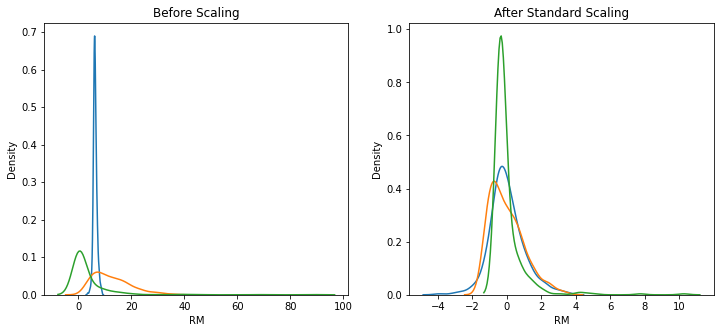

In [10]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

Note from the above plots how standardisation centered all the distributions at zero, but it preserved their original distribution. The value range is not identical, but it looks more homogeneous across the variables. 

Note something interesting in the following plot: 

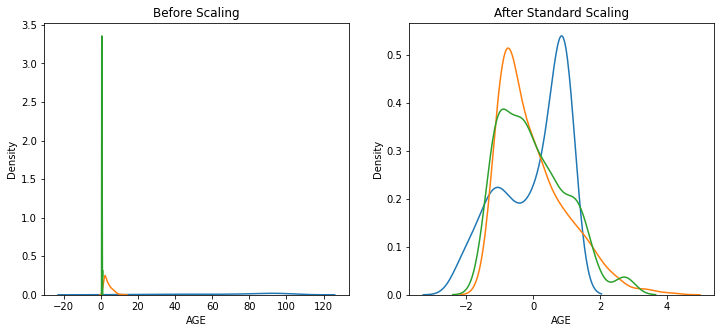

In [11]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## Recipe 54 - Mean Normalization 

In [12]:
# the scalers - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

In [13]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [15]:
# let's first learn the mean from the train set

means = X_train.mean(axis=0)
means

CRIM         3.358284
ZN          11.809322
INDUS       11.078757
CHAS         0.064972
NOX          0.556098
RM           6.308427
AGE         68.994068
DIS          3.762459
RAD          9.353107
TAX        401.782486
PTRATIO     18.473446
B          360.601186
LSTAT       12.440650
dtype: float64

In [16]:
# let's now learn the min and max values, and the value range 
# from the train set

ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.95230
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       35.25000
dtype: float64

In [17]:
# now we are ready to perform mean normalization:

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

## Mean Normalization with Scikit-learn: work-around

In [18]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the robustscaler so that it does NOT remove the median
# but normalises by max()-min(), important for this to set up the
# quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [19]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

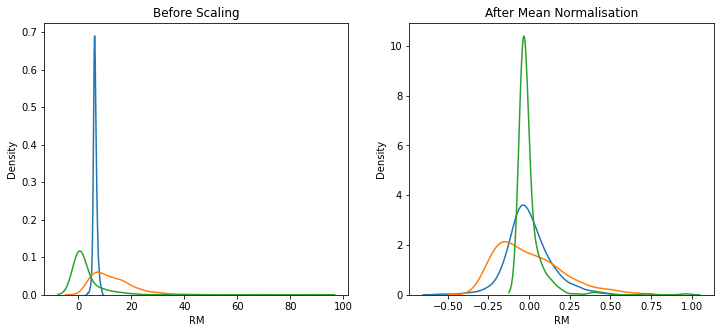

In [20]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

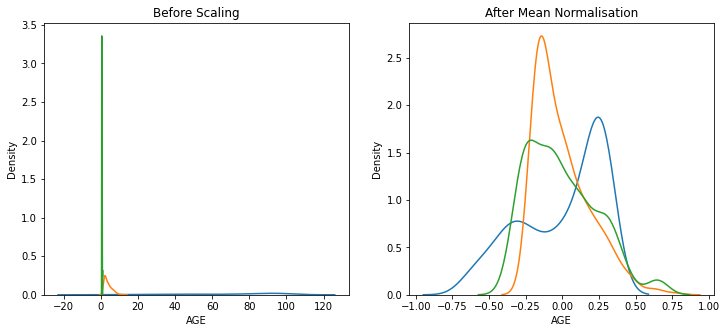

In [21]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()